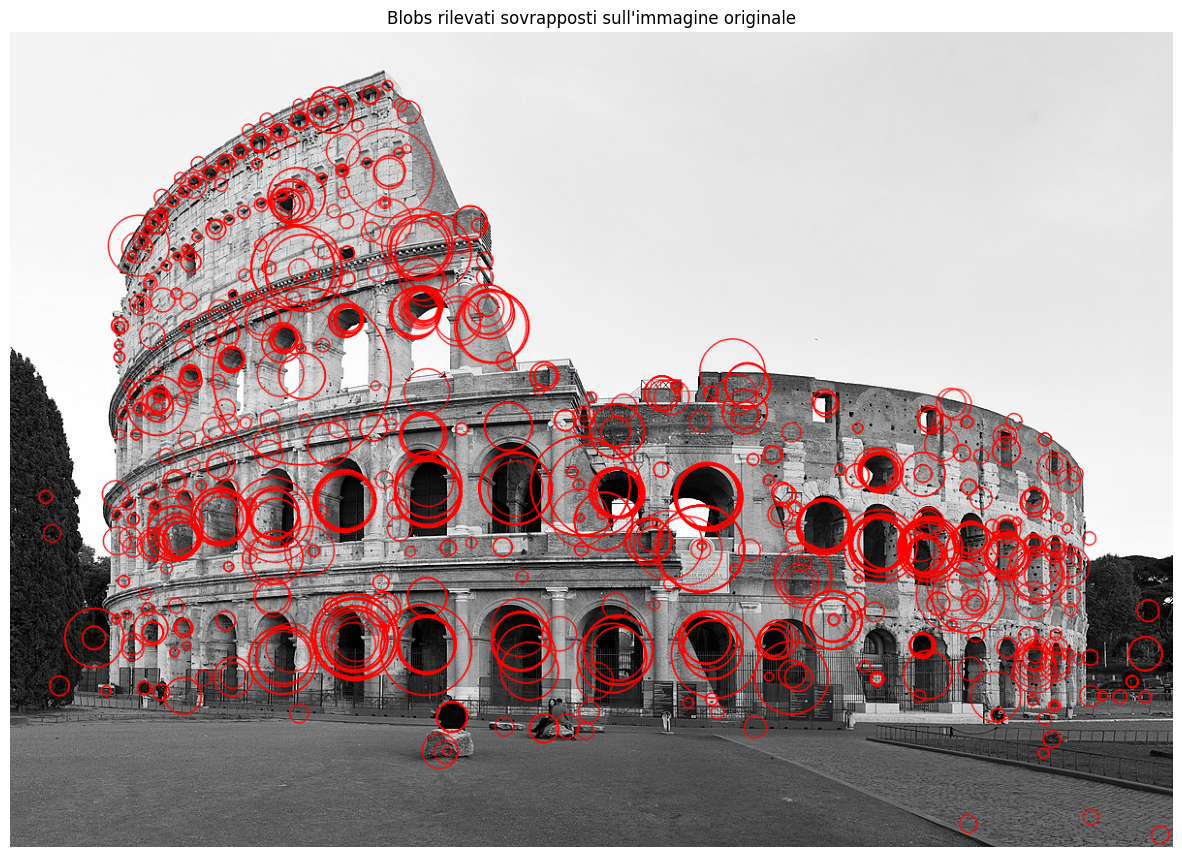

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Legge l'immagine in scala di grigi
im = cv2.imread("./images/colosseum.jpg", cv2.IMREAD_GRAYSCALE)

# Converte l'immagine in BGR per poter disegnare cerchi colorati
im_circle = cv2.cvtColor(im, cv2.COLOR_GRAY2BGR)

# Setup SimpleBlobDetector parameters
params = cv2.SimpleBlobDetector_Params()

# Cambia le soglie di rilevamento
params.minThreshold = 10
params.maxThreshold = 500

# Imposta i parametri
params.filterByCircularity = True
params.minCircularity = 0.01

params.filterByConvexity = True
params.minConvexity = 0.01

# Inizia il ciclo per iterare sui parametri chiave
for min_area in range(50, 4000, 200):           # Itera su varie dimensioni di area
    for min_inertia in [0.01, 0.1, 0.5, 1]:     # Itera su diverse soglie di inertia

        # Imposta i parametri
        params.filterByArea = True
        params.minArea = min_area

        params.filterByInertia = True
        params.minInertiaRatio = min_inertia

        # Crea un rilevatore con i parametri correnti
        detector = cv2.SimpleBlobDetector_create(params)

        # Rileva i blob
        keypoints = detector.detect(im)

        # Disegna i blob rilevati sull'immagine originale a colori
        im_circle = cv2.drawKeypoints(im_circle, keypoints, np.array([]), (0, 0, 255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Converti l'immagine in formato RGB per matplotlib
im_circle_rgb = cv2.cvtColor(im_circle, cv2.COLOR_BGR2RGB)

# Mostra l'immagine usando matplotlib
plt.figure(figsize=(15, 15))
plt.imshow(im_circle_rgb)
plt.title("Blobs rilevati sovrapposti sull'immagine originale")
plt.axis('off')  # Nasconde gli assi
plt.show()

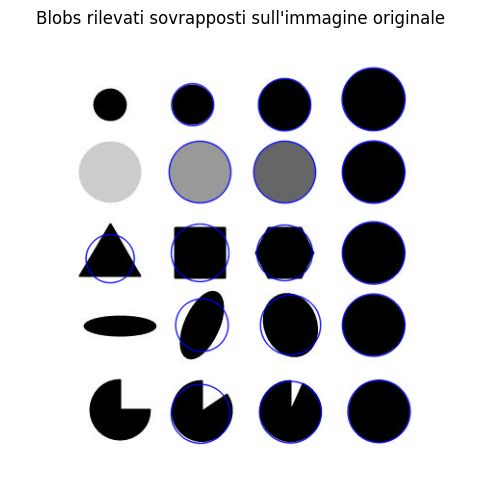

In [14]:
# Read image
im = cv2.imread("./images/blob.jpg", cv2.IMREAD_GRAYSCALE)

# Setup SimpleBlobDetector parameters.
params = cv2.SimpleBlobDetector_Params()

# Change thresholds
params.minThreshold = 10
params.maxThreshold = 200


# Filter by Area.
params.filterByArea = True
params.minArea = 1500

# Filter by Circularity
params.filterByCircularity = True
params.minCircularity = 0.1

# Filter by Convexity
params.filterByConvexity = True
params.minConvexity = 0.87
    
# Filter by Inertia
params.filterByInertia = True
params.minInertiaRatio = 0.01

# Create a detector with the parameters
ver = (cv2.__version__).split('.')
if int(ver[0]) < 3 :
	detector = cv2.SimpleBlobDetector(params)
else : 
	detector = cv2.SimpleBlobDetector_create(params)


# Detect blobs.
keypoints = detector.detect(im)

# Draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures
# the size of the circle corresponds to the size of blob

im_with_keypoints = cv2.drawKeypoints(im, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Converti l'immagine in formato RGB per matplotlib
#im_with_keypoints = cv2.cvtColor(im_with_keypoints, cv2.COLOR_BGR2RGB)

# Mostra l'immagine usando matplotlib
plt.figure(figsize=(6, 6))
plt.imshow(im_with_keypoints)
plt.title("Blobs rilevati sovrapposti sull'immagine originale")
plt.axis('off')  # Nasconde gli assi
plt.show()